In [3]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Import CSV
scores_df = pd.read_csv("../CSV_Files/spreadspoke_scores.csv")
scores_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14,23,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45,7,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27,7,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14,19,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24,3,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [5]:
# Limit Dataframe to Playoff games
playoffs_df = scores_df.loc[scores_df['schedule_playoff'] == True]
playoffs_df = playoffs_df.reset_index(drop = True)
playoffs_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1/1/1967,1966,Conference,True,Buffalo Bills,7,31,Kansas City Chiefs,NaN,NaN,NaN,War Memorial Stadium,False,NaN,NaN,NaN,NaN
1,1/1/1967,1966,Conference,True,Dallas Cowboys,27,34,Green Bay Packers,NaN,NaN,NaN,Cotton Bowl,False,40.0,8.0,75.0,NaN
2,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN
3,12/23/1967,1967,15,True,Green Bay Packers,28,7,Los Angeles Rams,NaN,NaN,NaN,Lambeau Field,False,13.0,15.0,60.0,NaN
4,12/24/1967,1967,15,True,Dallas Cowboys,52,14,Cleveland Browns,NaN,NaN,NaN,Cotton Bowl,False,44.0,12.0,54.0,NaN


In [6]:
# Drop Rows where there is no favorite team
playoffs_df = playoffs_df.dropna(subset = ['team_favorite_id'])
playoffs_df = playoffs_df.reset_index(drop = True)
playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1/15/1967,1966,Superbowl,True,Green Bay Packers,35,10,Kansas City Chiefs,GB,-14.0,NaN,Los Angeles Memorial Coliseum,True,54.0,7.0,90.0,NaN
1,1/14/1968,1967,Superbowl,True,Green Bay Packers,33,14,Oakland Raiders,GB,-13.5,43,Orange Bowl,True,60.0,12.0,74.0,NaN
2,1/12/1969,1968,Superbowl,True,Baltimore Colts,7,16,New York Jets,IND,-18.0,40,Orange Bowl,True,66.0,12.0,80.0,rain
3,1/11/1970,1969,Superbowl,True,Kansas City Chiefs,23,7,Minnesota Vikings,MIN,-12.0,39,Tulane Stadium,True,55.0,14.0,84.0,rain
4,1/17/1971,1970,Superbowl,True,Baltimore Colts,16,13,Dallas Cowboys,IND,-2.5,36,Orange Bowl,True,59.0,11.0,60.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
504,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
505,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
506,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [7]:
# Drop all games older than 5 years ago
playoffs_df = playoffs_df.drop(playoffs_df[playoffs_df.schedule_season < 2019].index)
playoffs_df = playoffs_df.reset_index(drop = True)
playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,-2.5,43,NRG Stadium,False,72.0,0.0,NaN,indoor
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,-4.5,45,Gillette Stadium,False,44.0,4.0,88.0,NaN
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,-7.5,49.5,Mercedes-Benz Superdome,False,72.0,0.0,NaN,indoor
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,-1.0,44.5,Lincoln Financial Field,False,41.0,17.0,40.0,NaN
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,-10.0,47.5,M&T Bank Stadium,False,69.0,12.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
59,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
60,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
61,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [23]:
# Clean erroneous team names and abbreviations
playoffs_df.loc[:,'team_home'] = playoffs_df.loc[:,'team_home'].replace('Oakland Raiders', 'Las Vegas Raiders')
playoffs_df.loc[:,'team_home'] = playoffs_df.loc[:,'team_home'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
playoffs_df.loc[:,'team_away'] = playoffs_df.loc[:,'team_away'].replace('Oakland Raiders', 'Las Vegas Raiders')
playoffs_df.loc[:,'team_away'] = playoffs_df.loc[:,'team_away'].replace({'Washington Redskins' : 'Washington Commanders', 
                                                                           'Washington Football Team' : 'Washington Commanders'})
playoffs_df.loc[:,'team_favorite_id'] = playoffs_df.loc[:,'team_favorite_id'].replace({'LV' : 'LVR'})

playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,-2.5,43,NRG Stadium,False,72.0,0.0,NaN,indoor
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,-4.5,45,Gillette Stadium,False,44.0,4.0,88.0,NaN
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,-7.5,49.5,Mercedes-Benz Superdome,False,72.0,0.0,NaN,indoor
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,-1.0,44.5,Lincoln Financial Field,False,41.0,17.0,40.0,NaN
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,-10.0,47.5,M&T Bank Stadium,False,69.0,12.0,70.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,-2.5,46,Highmark Stadium,False,25.0,11.0,67.0,NaN
59,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,-6.0,49.5,Ford Field,False,72.0,0.0,NaN,indoor
60,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,-4.5,44,M&T Bank Stadium,False,47.0,7.0,83.0,NaN
61,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,-7.5,53.5,Levi's Stadium,False,69.0,5.0,55.0,NaN


In [8]:
# Drop columns we don't need
playoffs_df = playoffs_df.drop(columns=['stadium', 'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
                              'weather_humidity', 'weather_detail', 'spread_favorite', 'over_under_line'])
playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL
...,...,...,...,...,...,...,...,...,...
58,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF
59,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET
60,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL
61,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF


In [9]:
# Add new columns for analysis
playoffs_df['team_home_id'] = ''
playoffs_df['team_away_id'] = ''
playoffs_df['result'] = ''
playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,,,
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,,,
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,,,
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,,,
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,,,
...,...,...,...,...,...,...,...,...,...,...,...,...
58,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,,,
59,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,,,
60,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,,,
61,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,,,


In [10]:
# Create Dataframe for team ID's 
ID_path = pd.read_csv('../CSV_Files/nfl_teams.csv')
IDs_df = pd.DataFrame(ID_path)
IDs_df['Abbreviation'] = IDs_df['Abbreviation'].replace('LV', 'LVR')
IDs_df

,ID,Name,Abbreviation,Conference,Division
0,1,Arizona Cardinals,ARI,NFC,West
1,2,Atlanta Falcons,ATL,NFC,South
2,3,Baltimore Ravens,BAL,AFC,North
3,4,Buffalo Bills,BUF,AFC,East
4,5,Carolina Panthers,CAR,NFC,South
5,6,Chicago Bears,CHI,NFC,North
6,7,Cincinnati Bengals,CIN,AFC,North
7,8,Cleveland Browns,CLE,AFC,North
8,9,Dallas Cowboys,DAL,NFC,East
9,10,Denver Broncos,DEN,AFC,West


In [12]:
# Create lists for team names and abbreviations
names = []
abbreviation = []

# Create Name Key Dictionary
for index, row in IDs_df.iterrows():
    names.append(row['Name'])
    abbreviation.append(row['Abbreviation'])

name_key = dict(zip(names,abbreviation))
name_key

{'Arizona Cardinals': 'ARI',
 'Atlanta Falcons': 'ATL',
 'Baltimore Ravens': 'BAL',
 'Buffalo Bills': 'BUF',
 'Carolina Panthers': 'CAR',
 'Chicago Bears': 'CHI',
 'Cincinnati Bengals': 'CIN',
 'Cleveland Browns': 'CLE',
 'Dallas Cowboys': 'DAL',
 'Denver Broncos': 'DEN',
 'Detroit Lions': 'DET',
 'Green Bay Packers': 'GB',
 'Houston Texans': 'HOU',
 'Indianapolis Colts': 'IND',
 'Jacksonville Jaguars': 'JAX',
 'Kansas City Chiefs': 'KC',
 'Miami Dolphins': 'MIA',
 'Minnesota Vikings': 'MIN',
 'New England Patriots': 'NE',
 'New Orleans Saints': 'NO',
 'New York Giants': 'NYG',
 'New York Jets': 'NYJ',
 'Las Vegas Raiders': 'LVR',
 'Philadelphia Eagles': 'PHI',
 'Pittsburgh Steelers': 'PIT',
 'Los Angeles Chargers': 'LAC',
 'San Francisco 49ers': 'SF',
 'Seattle Seahawks': 'SEA',
 'Los Angeles Rams': 'LAR',
 'Tampa Bay Buccaneers': 'TB',
 'Tennessee Titans': 'TEN',
 'Washington Commanders': 'WAS'}

In [13]:
# Fill in empty columns of playoff dataframe
playoffs_df['team_home_id'] = playoffs_df['team_home'].map(name_key)
playoffs_df['team_away_id'] = playoffs_df['team_away'].map(name_key)
playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,HOU,BUF,
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,NE,TEN,
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,NO,MIN,
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,PHI,SEA,
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,BAL,TEN,
...,...,...,...,...,...,...,...,...,...,...,...,...
58,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,
59,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,
60,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,
61,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,


In [14]:
# Determine winner of each game and include the ID in the result column
for index, row in playoffs_df.iterrows():
    if row['score_home'] > row['score_away']:
        playoffs_df.at[index, 'result'] = row['team_home_id']
    elif row['score_home'] < row['score_away']:
        playoffs_df.at[index, 'result'] = row['team_away_id']
    else:
        playoffs_df.at[index, 'result'] = 'Tie'

playoffs_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,HOU,BUF,HOU
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,NE,TEN,TEN
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,NO,MIN,MIN
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,PHI,SEA,SEA
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,BAL,TEN,TEN
...,...,...,...,...,...,...,...,...,...,...,...,...
58,1/21/2024,2023,Division,True,Buffalo Bills,24,27,Kansas City Chiefs,BUF,BUF,KC,KC
59,1/21/2024,2023,Division,True,Detroit Lions,31,23,Tampa Bay Buccaneers,DET,DET,TB,DET
60,1/28/2024,2023,Conference,True,Baltimore Ravens,10,17,Kansas City Chiefs,BAL,BAL,KC,KC
61,1/28/2024,2023,Conference,True,San Francisco 49ers,34,31,Detroit Lions,SF,SF,DET,SF


In [17]:
# Find rows where the favorite team won
pofav_df = playoffs_df[playoffs_df['team_favorite_id'] == playoffs_df['result']]
pofav_df = pofav_df.reset_index(drop = True)
pofav_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
0,1/4/2020,2019,Wildcard,True,Houston Texans,22,19,Buffalo Bills,HOU,HOU,BUF,HOU
1,1/11/2020,2019,Division,True,San Francisco 49ers,27,10,Minnesota Vikings,SF,SF,MIN,SF
2,1/12/2020,2019,Division,True,Green Bay Packers,28,23,Seattle Seahawks,GB,GB,SEA,GB
3,1/12/2020,2019,Division,True,Kansas City Chiefs,51,31,Houston Texans,KC,KC,HOU,KC
4,1/19/2020,2019,Conference,True,Kansas City Chiefs,35,24,Tennessee Titans,KC,KC,TEN,KC
5,1/19/2020,2019,Conference,True,San Francisco 49ers,37,20,Green Bay Packers,SF,SF,GB,SF
6,2/2/2020,2019,Superbowl,True,Kansas City Chiefs,31,20,San Francisco 49ers,KC,KC,SF,KC
7,1/9/2021,2020,Wildcard,True,Buffalo Bills,27,24,Indianapolis Colts,BUF,BUF,IND,BUF
8,1/9/2021,2020,Wildcard,True,Washington Football Team,23,31,Tampa Bay Buccaneers,TB,NaN,TB,TB
9,1/10/2021,2020,Wildcard,True,New Orleans Saints,21,9,Chicago Bears,NO,NO,CHI,NO


In [69]:
# Group by result team
pofav_df = pofav_df.groupby('result')
pofav_df

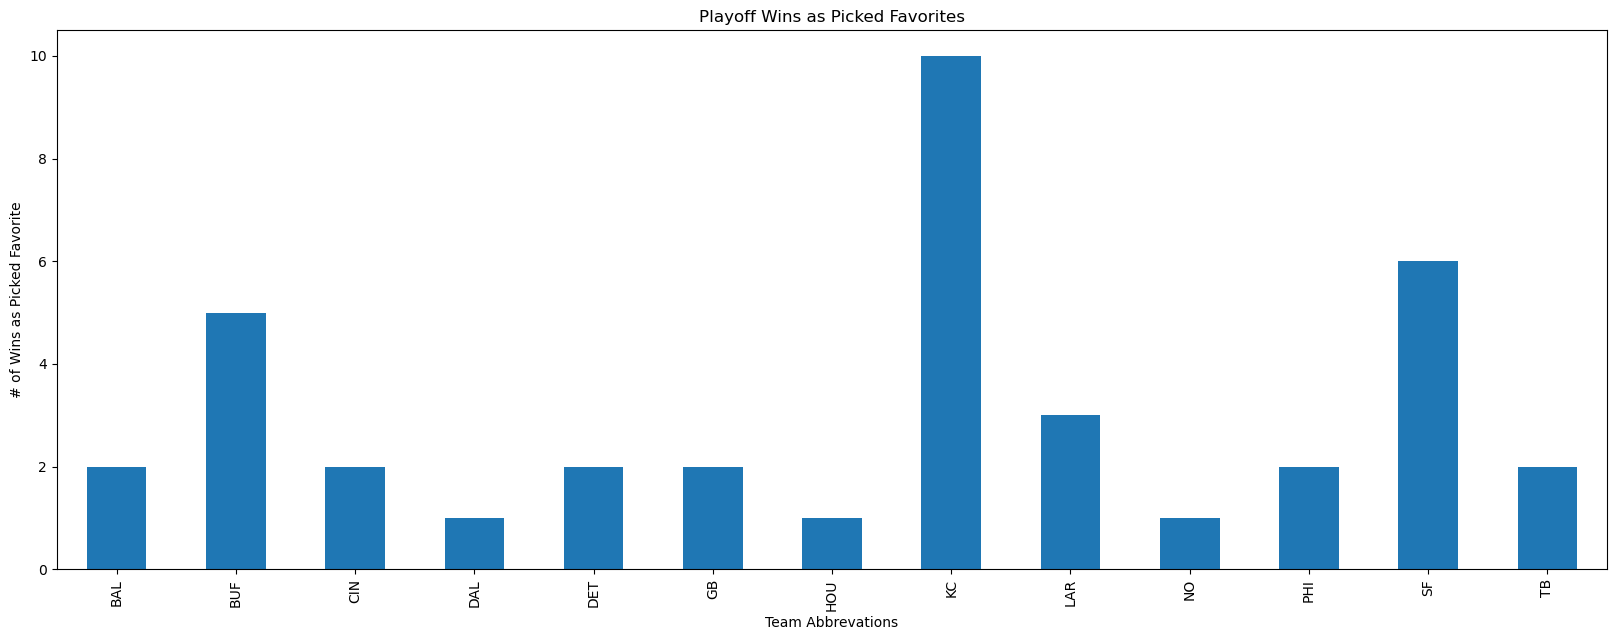

In [21]:
# Plot the counts for each team in a bar chart
pofav_df['result'].count().plot(kind = 'bar', figsize = (20,7))
plt.xlabel('Team Abbrevations')
plt.ylabel('# of Wins as Picked Favorite')
plt.title('Playoff Wins as Picked Favorites')
plt.show()

In [44]:
# Create dataframe where underdogs won instead of faves
poffunder_df = playoffs_df[playoffs_df['team_favorite_id'] != playoffs_df['result']]
poffunder_df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,team_home_id,team_away_id,result
1,1/4/2020,2019,Wildcard,True,New England Patriots,13,20,Tennessee Titans,NE,NE,TEN,TEN
2,1/5/2020,2019,Wildcard,True,New Orleans Saints,20,26,Minnesota Vikings,NO,NO,MIN,MIN
3,1/5/2020,2019,Wildcard,True,Philadelphia Eagles,9,17,Seattle Seahawks,PHI,PHI,SEA,SEA
4,1/11/2020,2019,Division,True,Baltimore Ravens,12,28,Tennessee Titans,BAL,BAL,TEN,TEN
12,1/9/2021,2020,Wildcard,True,Seattle Seahawks,20,30,Los Angeles Rams,SEA,SEA,LAR,LAR
15,1/10/2021,2020,Wildcard,True,Pittsburgh Steelers,37,48,Cleveland Browns,PIT,PIT,CLE,CLE
20,1/17/2021,2020,Division,True,New Orleans Saints,20,30,Tampa Bay Buccaneers,NO,NO,TB,TB
21,1/24/2021,2020,Conference,True,Green Bay Packers,26,31,Tampa Bay Buccaneers,GB,GB,TB,TB
23,2/7/2021,2020,Superbowl,True,Tampa Bay Buccaneers,31,9,Kansas City Chiefs,KC,TB,KC,TB
26,1/16/2022,2021,Wildcard,True,Dallas Cowboys,17,23,San Francisco 49ers,DAL,DAL,SF,SF


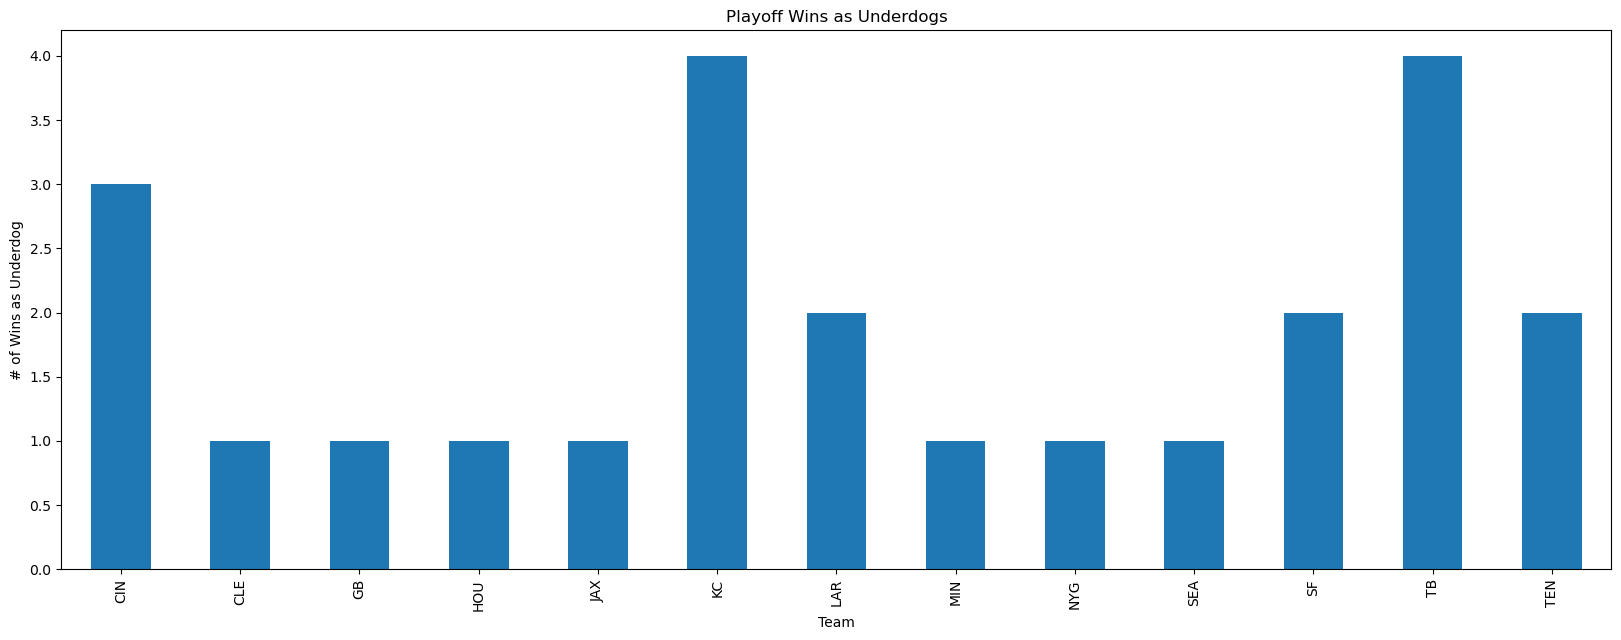

In [45]:
# Plot the counts for each team that won as an underdog
poffunder_df = poffunder_df.groupby('result')
poffunder_df['result'].count().plot(kind = 'bar', figsize = (20, 7))
plt.xlabel('Team')
plt.ylabel('# of Wins as Underdog')
plt.title('Playoff Wins as Underdogs')
plt.show()

In [107]:
#Create Outcomes Table
poffoutcome_df = pd.DataFrame(pofav_df['result'].count())
poffoutcome_df = poffoutcome_df.rename(columns = {'result' : 'favorite win count'})
poffoutcome_df['underdog win count'] = ''
poffoutcome_df['underdog win count'] = poffunder_df['result'].count()
poffoutcome_df['underdog win count'] = poffoutcome_df['underdog win count'].fillna(0)
poffoutcome_df

,favorite win count,underdog win count
result,,
BAL,2,0.0
BUF,5,0.0
CIN,2,3.0
DAL,1,0.0
DET,2,0.0
GB,2,1.0
HOU,1,1.0
KC,10,4.0
LAR,3,2.0


In [61]:
# Find Play off counts & winrates
poffcount = playoffs_df['team_favorite_id'].value_counts()
poffwinrate = (poffoutcome_df['favorite win count']/poffcount) * 100
poffwinrate = poffwinrate.fillna(0)
poffwinrate = poffwinrate.sort_values(ascending = False)
poffwinrate
#poffcount

LAR    100.000000
CIN    100.000000
DET    100.000000
HOU    100.000000
SF      85.714286
KC      83.333333
BUF     71.428571
TB      66.666667
BAL     50.000000
GB      50.000000
PHI     40.000000
NO      33.333333
DAL     33.333333
LAC      0.000000
MIN      0.000000
NE       0.000000
PIT      0.000000
SEA      0.000000
CLE      0.000000
TEN      0.000000
dtype: float64

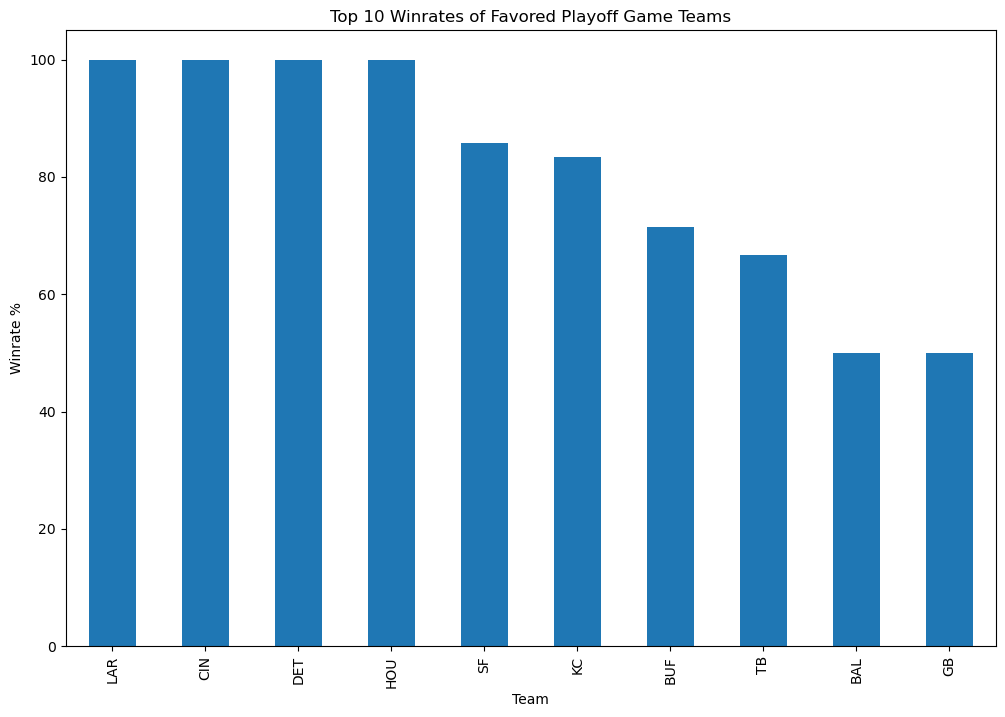

In [57]:
# Plot winrates
plt.figure(figsize = (12, 8))
poffwinrate.head(10).plot(kind = 'bar')
plt.title('Top 10 Winrates of Favored Playoff Game Teams')
plt.xlabel('Team')
plt.ylabel('Winrate %')
plt.show()

In [97]:
# Create favorite team picks dataframe
poffcount_df = pd.DataFrame({'Team':poffcount.index, 'Count': poffcount.values})
poffcount_df.columns = ['Team','Count']
poffcount_df['Team'] = poffcount_df['Team'].astype(str)
poffcount_df

,Team,Count
0,KC,12
1,SF,7
2,BUF,7
3,PHI,5
4,BAL,4
5,GB,4
6,TB,3
7,NO,3
8,LAR,3
9,DAL,3


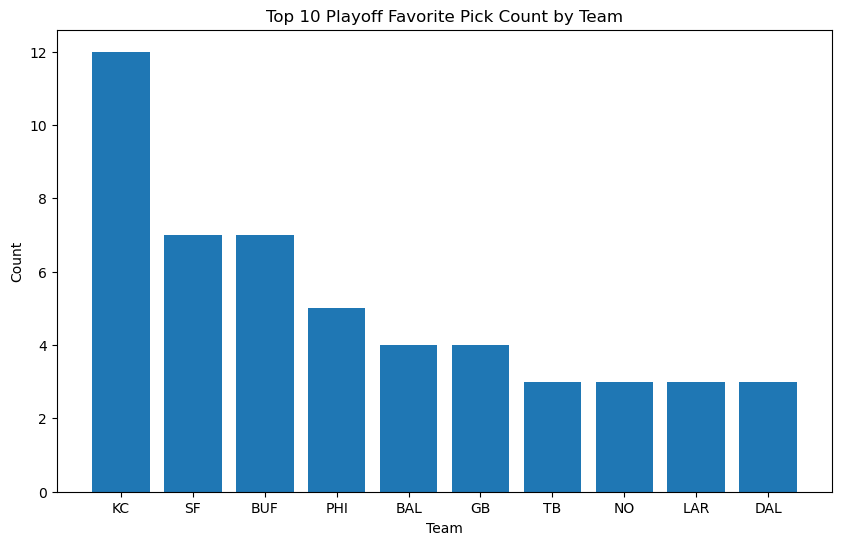

In [65]:
# Plot teams by playoff favorite pick counts
plt.figure(figsize = (10, 6))
plt.bar(poffcount_df['Team'].head(10), poffcount_df['Count'].head(10))
plt.title('Top 10 Playoff Favorite Pick Count by Team')
plt.xlabel('Team')
plt.ylabel('Count')
plt.show()

In [66]:
# Create win rate dataframe
poff_winrate_df = pd.DataFrame({'Team': poffwinrate.index, 'Winrate': poffwinrate.values})
poff_winrate_df.columns = ['Team','Winrate']
poff_winrate_df = poff_winrate_df.sort_values(by = 'Winrate', ascending = False)
poff_winrate_df

,Team,Winrate
0,LAR,100.000000
1,CIN,100.000000
2,DET,100.000000
3,HOU,100.000000
4,SF,85.714286
5,KC,83.333333
6,BUF,71.428571
7,TB,66.666667
8,BAL,50.000000
9,GB,50.000000


In [95]:
#Create favorite win df
poff_favwins_df = pd.DataFrame({'Team': poffoutcome_df.index, 'Wins': poffoutcome_df['favorite win count']})
poff_favwins_df = poff_favwins_df.reset_index(drop = True)
poff_favwins_df['Team'] = poff_favwins_df['Team'].astype(str)
poff_favwins_df

,Team,Wins
0,BAL,2
1,BUF,5
2,CIN,2
3,DAL,1
4,DET,2
5,GB,2
6,HOU,1
7,KC,10
8,LAR,3
9,NO,1


In [105]:
# Merge dataframes
poff_correlation_df = pd.merge(poffcount_df, poff_favwins_df, on = 'Team', how = 'left')
poff_correlation_df.columns = ['Team','Picks','Wins']
poff_correlation_df['Wins'] = poff_correlation_df['Wins'].fillna(0)
poff_correlation_df['Winrate'] = (poff_correlation_df['Wins'] / poff_correlation_df['Picks']) * 100
poff_correlation_df = poff_correlation_df.sort_values(by = 'Picks', ascending = False)
poff_correlation_df

,Team,Picks,Wins,Winrate
0,KC,12,10.0,83.333333
2,BUF,7,5.0,71.428571
1,SF,7,6.0,85.714286
3,PHI,5,2.0,40.000000
4,BAL,4,2.0,50.000000
5,GB,4,2.0,50.000000
6,TB,3,2.0,66.666667
7,NO,3,1.0,33.333333
8,LAR,3,3.0,100.000000
9,DAL,3,1.0,33.333333


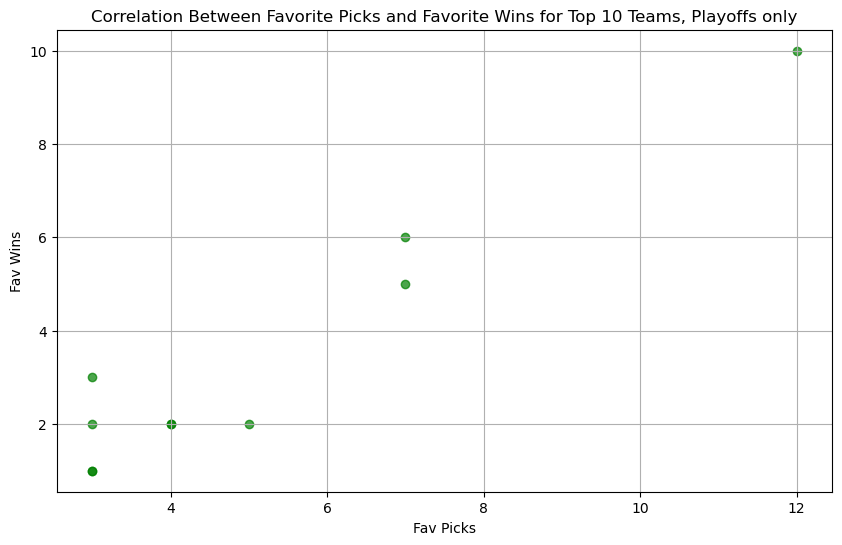

In [106]:
# Correlation Plot
plt.figure(figsize = (10,6))
plt.scatter(poff_correlation_df['Picks'].head(10), poff_correlation_df['Wins'].head(10), color = 'green', alpha = 0.7)
plt.title('Correlation Between Favorite Picks and Favorite Wins for Top 10 Teams, Playoffs only')
plt.xlabel('Fav Picks')
plt.ylabel('Fav Wins')
plt.grid(True)
plt.show()